In [1]:
import os
os.getenv("LD_LIBRARY_PATH")

':/home/annazan/miniconda3/envs/fair38/lib/'

In [2]:
!echo $LD_LIBRARY_PATH
!source ~/.bashrc
!echo $LD_LIBRARY_PATH


/bin/bash: /home/annazan/miniconda3/envs/fair38/lib/libtinfo.so.6: no version information available (required by /bin/bash)
:/home/annazan/miniconda3/envs/fair38/lib/
/bin/bash: /home/annazan/miniconda3/envs/fair38/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/annazan/miniconda3/envs/fair38/lib/libtinfo.so.6: no version information available (required by /bin/bash)
:/home/annazan/miniconda3/envs/fair38/lib/


In [3]:

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
import os
import sys
print(os.getcwd())
os.environ.update(os.environ)
        # Add a new environment variable to the operating system
os.environ["RAMP_HOME"] = os.getcwd()
# Print the environment variables to verify that the new variable was added
print(os.environ["RAMP_HOME"])
sys.path.append('../')
sys.path.append('../ramp-code/')
sys.path.append('ramp-code')


/home/annazan/fAIr-utilities
/home/annazan/fAIr-utilities


In [5]:
import cv2

In [6]:
os.environ["SM_FRAMEWORK"] = "tf.keras"
import ramp.utils
import hot_fair_utilities
# base_path = f"{os.getcwd()}/ramp-data/sample_2"
# base_path = "/home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar"
base_path = f"{os.getcwd()}/ramp-data/test_data/1_Zanzibar"

Segmentation Models: using `tf.keras` framework.


In [7]:
from hot_fair_utilities import preprocess
model_input_image_path = f"{base_path}/input"
preprocess_output=f"{base_path}/preprocessed"
preprocess(
            input_path = model_input_image_path,
            output_path = preprocess_output,
            rasterize=True,
            rasterize_options=["binary"],
            georeference_images=True,
        )

Georeferencing for input:   0%|          | 0/10 [00:00<?, ?it/s]

/home/annazan/miniconda3/envs/fair38/lib/python3.8/site-packages/osgeo/gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(
Georeferencing for input: 100%|██████████| 10/10 [00:00<00:00, 12.52it/s]
/home/annazan/miniconda3/envs/fair38/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/annazan/miniconda3/envs/fair38/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
Clipping labels for input:   0%|          | 0/10 [00:00<?, ?it/s]/home/annazan/miniconda3/envs/fair38/lib/python3.8/site-packages/geopandas/io/file.py

In [8]:
from hot_fair_utilities import train

variables are /home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/preprocessed
 and /home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train
Starting to prepare data for training
ramp home is /home/annazan/fAIr-utilities
python home is None
variables are: src /home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/preprocessed
 and dst:/home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train


Writing /home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train/fair_split_train.csv
Writing /home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train/fair_split_val.csv


done split
Data is ready for training
Metric constructor function: get_sparse_categorical_accuracy_fn
Model: importing saved model /home/annazan/fAIr-utilities/ramp-code/ramp/checkpoint.tf
Starting Training with 4 epochs , 2 batch size , 4 steps per epoch , 1 validation steps......
Epoch 1/4
4/4 [==============================] - ETA: 0s - loss: 0.1385 - sparse_categorical_accuracy: 0.9655

INFO:tensorflow:Assets written to: /home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train/model-checkpts/20240111-113024/model_20240111-113024_001_0.915.tf/assets


INFO:tensorflow:Assets written to: /home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train/model-checkpts/20240111-113024/model_20240111-113024_001_0.915.tf/assets


4/4 [==============================] - 57s 9s/step - loss: 0.1385 - sparse_categorical_accuracy: 0.9655 - val_loss: 0.2535 - val_sparse_categorical_accuracy: 0.9153
Epoch 2/4
4/4 [==============================] - ETA: 0s - loss: 0.1474 - sparse_categorical_accuracy: 0.9668

INFO:tensorflow:Assets written to: /home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train/model-checkpts/20240111-113024/model_20240111-113024_002_0.925.tf/assets


INFO:tensorflow:Assets written to: /home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train/model-checkpts/20240111-113024/model_20240111-113024_002_0.925.tf/assets


4/4 [==============================] - 23s 7s/step - loss: 0.1474 - sparse_categorical_accuracy: 0.9668 - val_loss: 0.2145 - val_sparse_categorical_accuracy: 0.9253
Epoch 3/4
4/4 [==============================] - ETA: 0s - loss: 0.1020 - sparse_categorical_accuracy: 0.9687

INFO:tensorflow:Assets written to: /home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train/model-checkpts/20240111-113024/model_20240111-113024_003_0.934.tf/assets


INFO:tensorflow:Assets written to: /home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train/model-checkpts/20240111-113024/model_20240111-113024_003_0.934.tf/assets


4/4 [==============================] - 22s 7s/step - loss: 0.1020 - sparse_categorical_accuracy: 0.9687 - val_loss: 0.1893 - val_sparse_categorical_accuracy: 0.9339
Epoch 4/4
4/4 [==============================] - ETA: 0s - loss: 0.0609 - sparse_categorical_accuracy: 0.9790

INFO:tensorflow:Assets written to: /home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train/model-checkpts/20240111-113024/model_20240111-113024_004_0.938.tf/assets


INFO:tensorflow:Assets written to: /home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train/model-checkpts/20240111-113024/model_20240111-113024_004_0.938.tf/assets


4/4 [==============================] - 22s 7s/step - loss: 0.0609 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.1747 - val_sparse_categorical_accuracy: 0.9377
Training Finished , Time taken to train : 124.01183034199948 seconds
Generating graphs ....
Graph generated at : /home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train/graphs
accuracy [0.9655323028564453, 0.9667576551437378, 0.9687151312828064, 0.9789952039718628]
accuracy [0.915252685546875, 0.925262451171875, 0.9339141845703125, 0.937652587890625]
loss [0.1385231614112854, 0.1473977416753769, 0.10204935073852539, 0.06091352552175522]
extracting highest accuracy model
/home/annazan/fAIr-utilities/ramp-data/test_data/1_Zanzibar/train/model-checkpts/20240111-113024
model_20240111-113024_004_0.938.tf


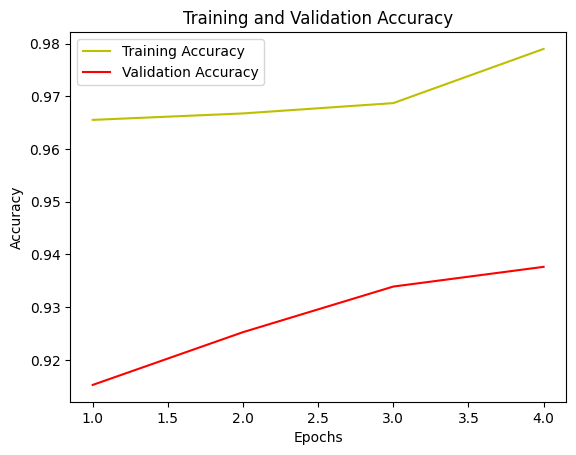

In [9]:
train_output = f"{base_path}/train"
final_accuracy, final_model_path = train(
    input_path=preprocess_output,
    output_path=train_output,
    epoch_size=4,
    batch_size=2,
    model="ramp",
    model_home=os.environ["RAMP_HOME"]
)

# here a tf file is created (weights + structure)

In [ ]:
print(final_accuracy,final_model_path)

In [ ]:
from hot_fair_utilities import predict
prediction_output = f"{base_path}/prediction/output"
predict(
    checkpoint_path=final_model_path,
    input_path=f"{base_path}/prediction/input",
    prediction_path=prediction_output,
)

In [ ]:
from hot_fair_utilities import polygonize
geojson_output= f"{prediction_output}/prediction.geojson"
polygonize(
    input_path=prediction_output, 
    output_path=geojson_output,
    remove_inputs = True,
)